In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Python DeBugger
import pdb 

In [2]:
# Device configuration
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [3]:
# Hyper Parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001


In [4]:
# Data Loader : 2step

# 1 step 물리적인 장소에 저장
train_dataset = torchvision.datasets.MNIST(root='./', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./', train=False, transform=transforms.ToTensor(), download=True)

# 2 step DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [5]:
# Convolution NeuralNet...two Layers

class ConvNet(nn.Module):

    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        # Sequential 안에 fc레이어 x 
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2), # (16, 28, 28)
            nn.BatchNorm2d(16),
            nn.ReLU()
        )
        self.layer2 = nn.MaxPool2d(kernel_size=2, stride=2) # (16, 14, 14)
        self.layer3 = nn.Sequential(
                    nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2), # (32, 14, 14)
                    nn.BatchNorm2d(32),
                    nn.ReLU()
        )
        self.layer4 = nn.MaxPool2d(kernel_size=2, stride=2) # (32, 7, 7)
        self.layer5 = nn.Linear(7*7*32, 10)
        
    
    def forward(self, x):
        # pdb
        # pdb.set_trace()
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.reshape(out.size(0), -1) # (batch_size, 32, 7, 7) -> (batch_size, 32*7*7)
        out = self.layer5(out)

        return out

In [6]:
model = ConvNet(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [7]:
# Training
total_step = len(train_loader)

for epoch in range(num_epochs):
    for idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        #1. pdb 사용... images, labels의 사이즈를 직접 확인
        # pdb.set_trace()
        outputs = model(images)  # model(images) == model.forward(images)
        # pdb.set_trace()
        loss = criterion(outputs, labels) # 100개의 이미지에 대한 L(w)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()    
        
        if (idx+1) % 100 == 0:
            print(f'EPOCH: {epoch+1}/{num_epochs} ITERAION: {idx+1}/{len(train_loader)} LOSS: {loss.item():.4f}')
        

EPOCH: 1/5 ITERAION: 100/600 LOSS: 0.1614
EPOCH: 1/5 ITERAION: 200/600 LOSS: 0.0561
EPOCH: 1/5 ITERAION: 300/600 LOSS: 0.1262
EPOCH: 1/5 ITERAION: 400/600 LOSS: 0.0606
EPOCH: 1/5 ITERAION: 500/600 LOSS: 0.1275
EPOCH: 1/5 ITERAION: 600/600 LOSS: 0.1392
EPOCH: 2/5 ITERAION: 100/600 LOSS: 0.0281
EPOCH: 2/5 ITERAION: 200/600 LOSS: 0.0624
EPOCH: 2/5 ITERAION: 300/600 LOSS: 0.0326
EPOCH: 2/5 ITERAION: 400/600 LOSS: 0.1808
EPOCH: 2/5 ITERAION: 500/600 LOSS: 0.0182
EPOCH: 2/5 ITERAION: 600/600 LOSS: 0.0525
EPOCH: 3/5 ITERAION: 100/600 LOSS: 0.0213
EPOCH: 3/5 ITERAION: 200/600 LOSS: 0.0926
EPOCH: 3/5 ITERAION: 300/600 LOSS: 0.0296
EPOCH: 3/5 ITERAION: 400/600 LOSS: 0.0533
EPOCH: 3/5 ITERAION: 500/600 LOSS: 0.0099
EPOCH: 3/5 ITERAION: 600/600 LOSS: 0.0127
EPOCH: 4/5 ITERAION: 100/600 LOSS: 0.0436
EPOCH: 4/5 ITERAION: 200/600 LOSS: 0.0055
EPOCH: 4/5 ITERAION: 300/600 LOSS: 0.0062
EPOCH: 4/5 ITERAION: 400/600 LOSS: 0.0472
EPOCH: 4/5 ITERAION: 500/600 LOSS: 0.0100
EPOCH: 4/5 ITERAION: 600/600 LOSS:

In [8]:
# Evaluation

model.eval()

with torch.no_grad():
    correct = 0
    total = 0    
    for (images, labels) in test_loader:
        images, labels = images.to(device), labels.to(device)  #(100, 1, 28,28) , (100,)

        outputs = model(images) # (100,10)

        # pdb.set_trace()
        _, predicted = torch.max(outputs, 1) #(100,)

        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f'Evaualtion Model Test Accuracy: {correct / total * 100:.3f}%')
   

Evaualtion Model Test Accuracy: 98.840%


In [9]:
torch.save(model.state_dict(), 'model.ckpt')

In [10]:
import numpy as np
import matplotlib.pyplot as plt

idx = 12
image = np.array(images[idx,0].detach().cpu())
label = labels[idx].item()
pred= predicted[idx].item()

Label: 1
Pred: 1


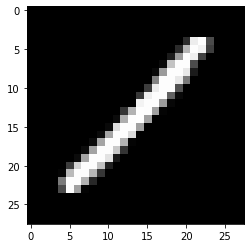

In [11]:
plt.imshow(image, cmap= 'gray')
print('Label:', label)
print('Pred:', pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


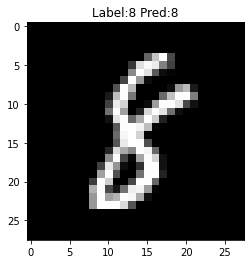

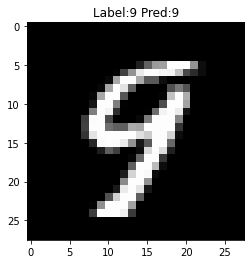

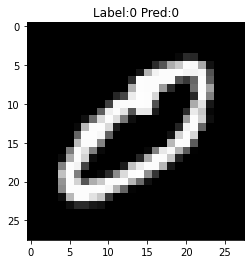

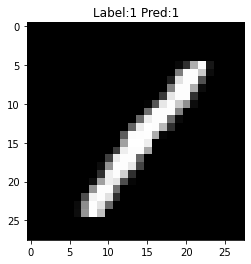

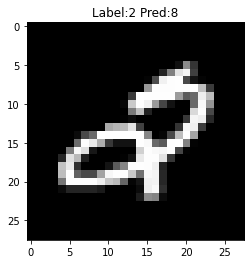

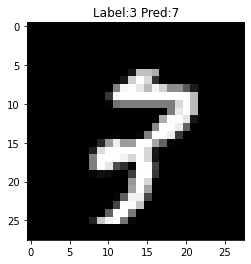

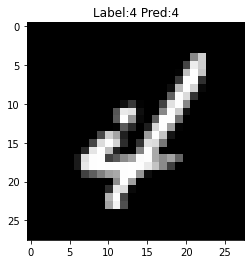

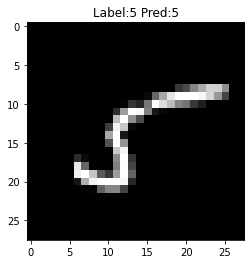

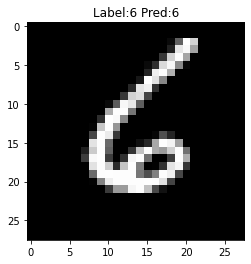

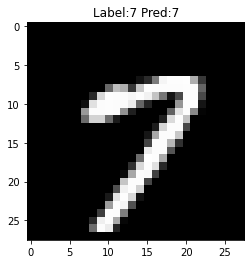

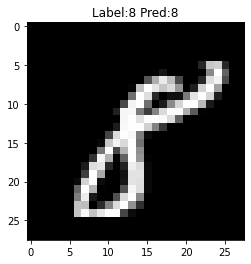

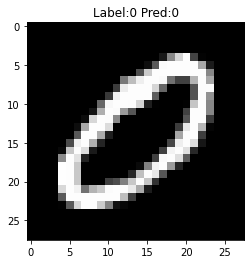

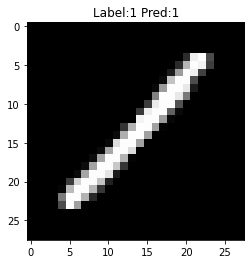

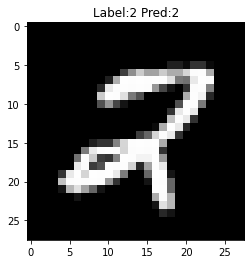

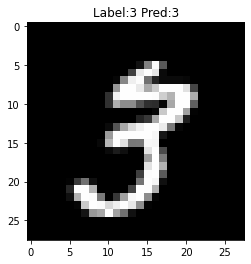

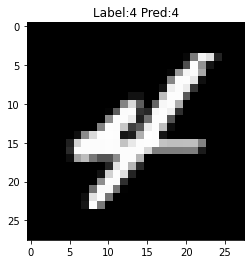

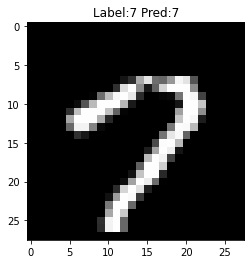

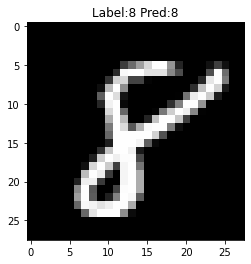

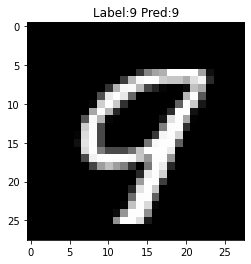

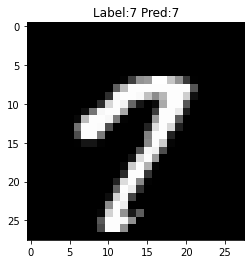

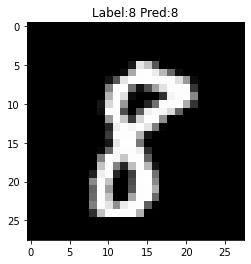

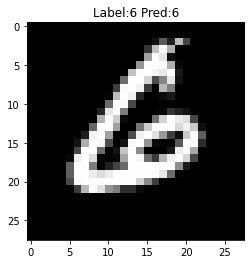

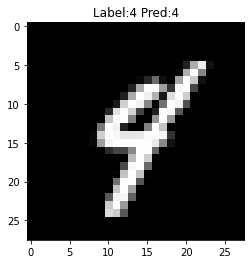

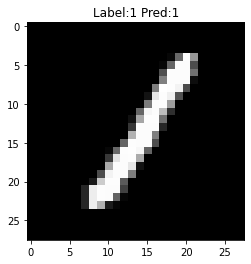

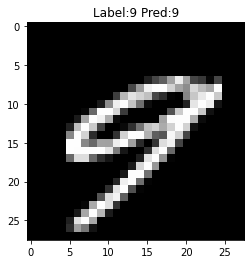

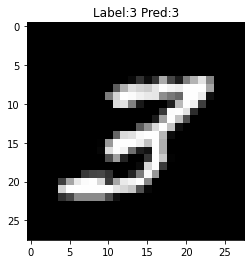

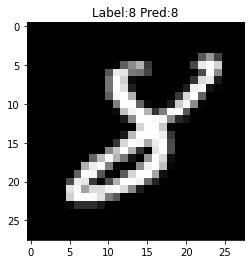

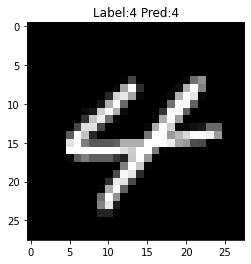

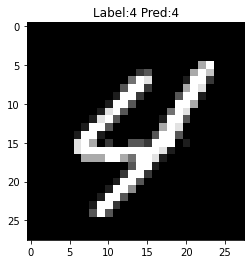

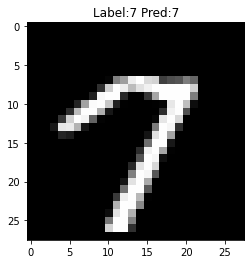

In [12]:
for idx in range(30):
    image = np.array(images[idx,0].detach().cpu())
    label = labels[idx].item()
    pred= predicted[idx].item()

    plt.figure()
    plt.title(f'Label:{label} Pred:{pred}')
    plt.imshow(image, cmap= 'gray')